In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Go to directory
os.chdir('Desktop\SpringboardWork\London_Smart_Meter')

In [3]:
# import household information
ihdf = pd.read_csv('informations_households.csv')

In [4]:
ihdf.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [5]:
ihdf.describe()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
count,5566,5566,5566,5566,5566
unique,5566,2,19,5,112
top,MAC004554,Std,ACORN-E,Affluent,block_16
freq,1,4443,1567,2192,50


In [6]:
# import all of the daily datasets
import glob

path = r'C:\Users\james\Desktop\SpringboardWork\London_Smart_Meter\daily_dataset\corrected'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [7]:
concatenated_df.tail()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
3510428,MAC005019,2014-02-24,0.0915,0.091938,0.192,48,0.029466,4.413,0.046
3510429,MAC005019,2014-02-25,0.0735,0.251104,1.455,48,0.369093,12.053,0.029
3510430,MAC005019,2014-02-26,0.0740,0.117604,0.554,48,0.112632,5.645,0.031
3510431,MAC005019,2014-02-27,0.0605,0.086521,0.449,48,0.076162,4.153,0.029
3510432,MAC005019,2014-02-28,0.0740,0.074000,0.074,1,NaN,0.074,0.074


In [8]:
dfnac = concatenated_df.isna().sum()
dfnac

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

In [9]:
# merge data frames to match data with Acorn and Acorn_grouped
df = pd.merge(concatenated_df, ihdf, on='LCLid', how='left')

In [10]:
df['Day'] = pd.to_datetime(df.day).dt.strftime('%Y-%m-%d')

In [11]:
df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file,Day
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000,Std,ACORN-A,Affluent,block_0,2012-10-12
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076,Std,ACORN-A,Affluent,block_0,2012-10-13
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070,Std,ACORN-A,Affluent,block_0,2012-10-14
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070,Std,ACORN-A,Affluent,block_0,2012-10-15
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087,Std,ACORN-A,Affluent,block_0,2012-10-16


In [12]:
df.describe()

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,3.510403e+06,3.510403e+06,3.510403e+06,3.510433e+06,3.499102e+06,3.510403e+06,3.510403e+06
mean,1.587395e-01,2.117305e-01,8.345210e-01,4.780364e+01,1.726673e-01,1.012414e+01,5.962578e-02
std,1.701865e-01,1.908460e-01,6.683156e-01,2.810982e+00,1.531208e-01,9.128793e+00,8.701312e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.700000e-02,9.808333e-02,3.460000e-01,4.800000e+01,6.911626e-02,4.682000e+00,2.000000e-02
50%,1.145000e-01,1.632917e-01,6.880000e-01,4.800000e+01,1.327910e-01,7.815000e+00,3.900000e-02
75%,1.910000e-01,2.624583e-01,1.128000e+00,4.800000e+01,2.293124e-01,1.256900e+01,7.100000e-02
max,6.970500e+00,6.928250e+00,1.076100e+01,4.800000e+01,4.024569e+00,3.325560e+02,6.524000e+00


In [13]:
# count the NaNs
dfna = df.isna().sum()
dfna

LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
stdorToU             0
Acorn                0
Acorn_grouped        0
file                 0
Day                  0
dtype: int64

In [14]:
#examine the NaNs
df[df['energy_median'].isna()]

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file,Day
58310,MAC000393,2012-12-18,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-D,Affluent,block_10,2012-12-18
69764,MAC002014,2012-12-18,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-D,Affluent,block_10,2012-12-18
397641,MAC002629,2013-04-16,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-Q,Adversity,block_109,2013-04-16
403985,MAC005556,2012-12-19,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-Q,Adversity,block_109,2012-12-19
403986,MAC005563,2012-12-19,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-Q,Adversity,block_109,2012-12-19
659942,MAC001957,2012-12-18,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-E,Affluent,block_17,2012-12-18
736354,MAC005558,2012-12-19,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-E,Affluent,block_19,2012-12-19
764072,MAC005062,2012-12-18,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_2,2012-12-18
1010470,MAC005037,2013-01-04,NaN,NaN,NaN,0,NaN,NaN,NaN,Std,ACORN-E,Affluent,block_27,2013-01-04
1117678,MAC003559,2013-10-29,NaN,NaN,NaN,0,NaN,NaN,NaN,ToU,ACORN-C,Affluent,block_3,2013-10-29


In [16]:
# with small count of NaN and because energy usage will likely resemble the prior day's usage, I will forward fill NaNs
df = df.ffill(axis=0)

In [17]:
# create a new data frame that takes the sum and count of elements so to calculate the total energy per household
dfs = df.groupby(['Day']).sum()
dfc = df.groupby(['Day']).count()
df1 = pd.merge(dfs, dfc, on='Day', how='inner', suffixes=("_sum", "_count"))

In [18]:
df1

,energy_median_sum,energy_mean_sum,energy_max_sum,energy_count_sum,energy_std_sum,energy_sum_sum,energy_min_sum,LCLid,day,energy_median_count,energy_mean_count,energy_max_count,energy_count_count,energy_std_count,energy_sum_count,energy_min_count,stdorToU,Acorn,Acorn_grouped,file
Day,,,,,,,,,,,,,,,,,,,,
2011-11-23,2.9660,3.654184,9.835000,334,2.264165,90.385000,1.113,13,13,13,13,13,13,13,13,13,13,13,13,13
2011-11-24,4.8395,5.855170,19.046000,922,3.909215,213.412000,2.019,25,25,25,25,25,25,25,25,25,25,25,25,25
2011-11-25,5.6890,7.196841,23.246000,1383,4.962879,303.993000,2.283,32,32,32,32,32,32,32,32,32,32,32,32,32
2011-11-26,8.3345,10.153053,33.868000,1773,7.115718,420.976000,3.002,41,41,41,41,41,41,41,41,41,41,41,41,41
2011-11-27,7.4235,9.268396,35.484000,1968,7.180928,444.883001,2.867,41,41,41,41,41,41,41,41,41,41,41,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-24,778.3645,1083.467830,4374.392002,239633,918.117134,51994.547004,288.777,4994,4994,4994,4994,4994,4994,4994,4994,4994,4994,4994,4994,4994
2014-02-25,777.2660,1073.282400,4346.186001,239301,907.203117,51423.508001,291.407,4995,4995,4995,4995,4995,4995,4995,4995,4995,4995,4995,4995,4995
2014-02-26,761.2415,1062.396848,4345.197997,239228,902.358137,50943.305995,287.121,4993,4993,4993,4993,4993,4993,4993,4993,4993,4993,4993,4993,4993


In [19]:
# Calculating the average energy per unit per day
df1['Tot_E_per_id'] = df1['energy_sum_sum']/df1['energy_sum_count']

In [20]:
df1

,energy_median_sum,energy_mean_sum,energy_max_sum,energy_count_sum,energy_std_sum,energy_sum_sum,energy_min_sum,LCLid,day,energy_median_count,...,energy_max_count,energy_count_count,energy_std_count,energy_sum_count,energy_min_count,stdorToU,Acorn,Acorn_grouped,file,Tot_E_per_id
Day,,,,,,,,,,,,,,,,,,,,,
2011-11-23,2.9660,3.654184,9.835000,334,2.264165,90.385000,1.113,13,13,13,...,13,13,13,13,13,13,13,13,13,6.952692
2011-11-24,4.8395,5.855170,19.046000,922,3.909215,213.412000,2.019,25,25,25,...,25,25,25,25,25,25,25,25,25,8.536480
2011-11-25,5.6890,7.196841,23.246000,1383,4.962879,303.993000,2.283,32,32,32,...,32,32,32,32,32,32,32,32,32,9.499781
2011-11-26,8.3345,10.153053,33.868000,1773,7.115718,420.976000,3.002,41,41,41,...,41,41,41,41,41,41,41,41,41,10.267707
2011-11-27,7.4235,9.268396,35.484000,1968,7.180928,444.883001,2.867,41,41,41,...,41,41,41,41,41,41,41,41,41,10.850805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-24,778.3645,1083.467830,4374.392002,239633,918.117134,51994.547004,288.777,4994,4994,4994,...,4994,4994,4994,4994,4994,4994,4994,4994,4994,10.411403
2014-02-25,777.2660,1073.282400,4346.186001,239301,907.203117,51423.508001,291.407,4995,4995,4995,...,4995,4995,4995,4995,4995,4995,4995,4995,4995,10.294997
2014-02-26,761.2415,1062.396848,4345.197997,239228,902.358137,50943.305995,287.121,4993,4993,4993,...,4993,4993,4993,4993,4993,4993,4993,4993,4993,10.202945


In [21]:
# create a new dataframe with only Total Energy per household
dfe = df1[['Tot_E_per_id']]
dfe

,Tot_E_per_id
Day,
2011-11-23,6.952692
2011-11-24,8.536480
2011-11-25,9.499781
2011-11-26,10.267707
2011-11-27,10.850805
...,...
2014-02-24,10.411403
2014-02-25,10.294997
2014-02-26,10.202945


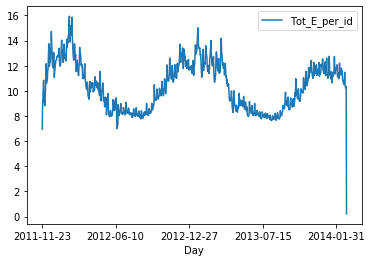

In [22]:
dfe.plot()

In [23]:
# create a new data frame that takes the sum and count of elements so to calculate the total energy per household
for i in df.Acorn_grouped.unique():
    x = df[df.Acorn_grouped==i]
    x1 = x.groupby(['Day']).sum()
    x2 = x.groupby(['Day']).count()
    x3 = pd.merge(x1, x2, on='Day', how='inner', suffixes=("_sum", "_count"))
    x3[i] = x3['energy_sum_sum']/x3['energy_sum_count']
    dfe = pd.merge(dfe, x3[i], on='Day', how='left')

In [24]:
for i in df.Acorn.unique():
    z = df[df.Acorn==i]
    z1 = z.groupby(['Day']).sum()
    z2 = z.groupby(['Day']).count()
    z3 = pd.merge(z1, z2, on='Day', how='inner', suffixes=("_sum", "_count"))
    z3[i] = z3['energy_sum_sum']/z3['energy_sum_count']
    dfe = pd.merge(dfe, z3[i], on='Day', how='left')

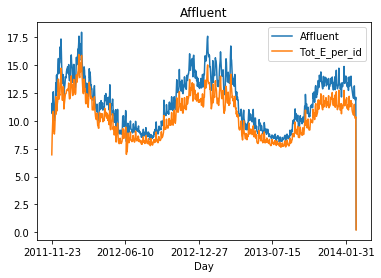

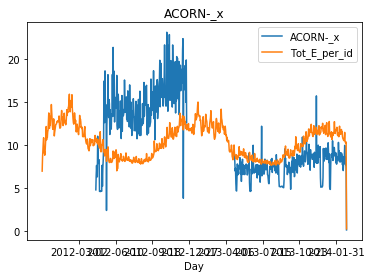

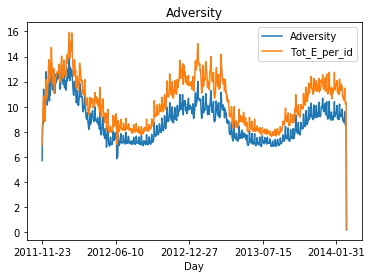

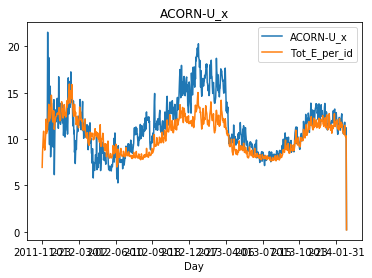

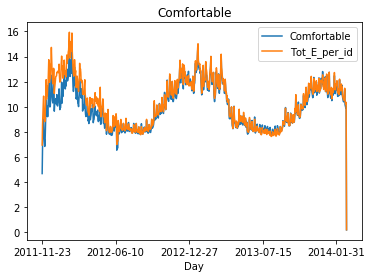

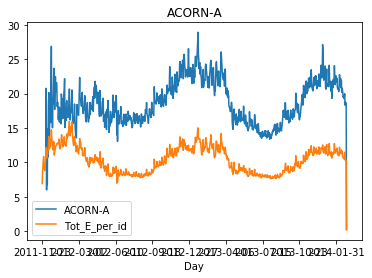

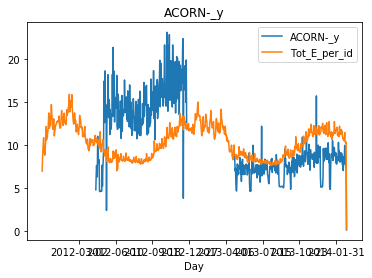

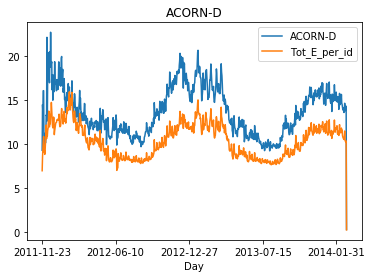

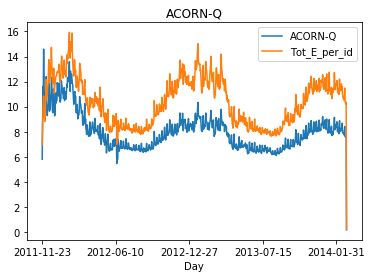

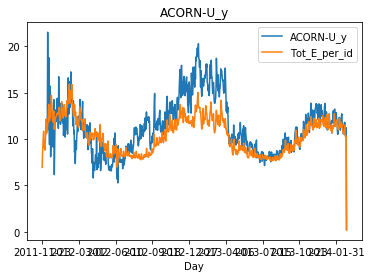

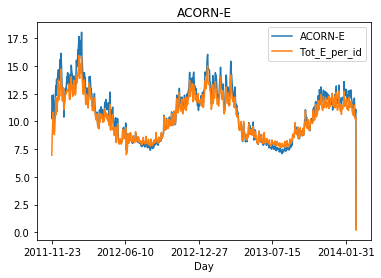

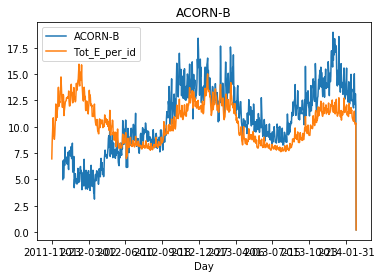

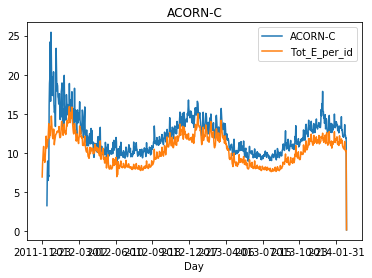

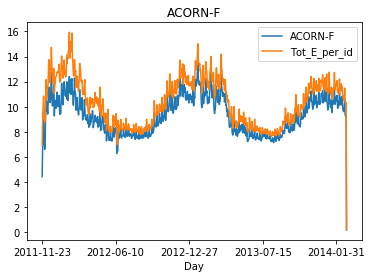

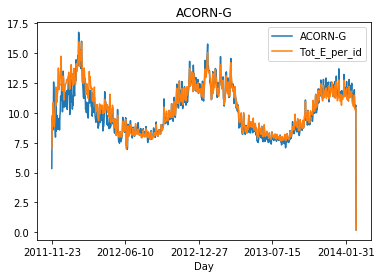

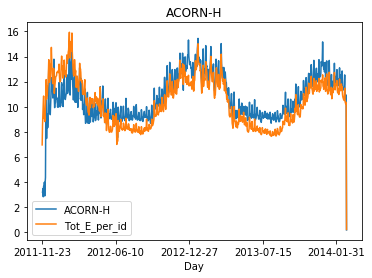

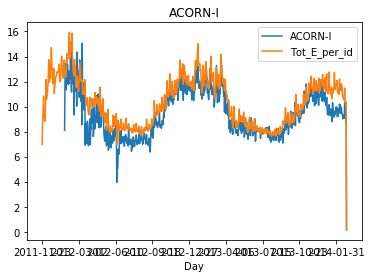

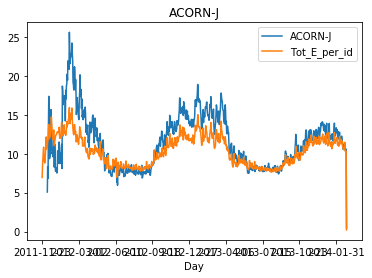

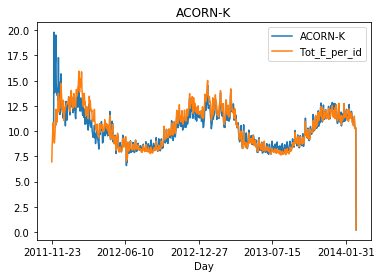

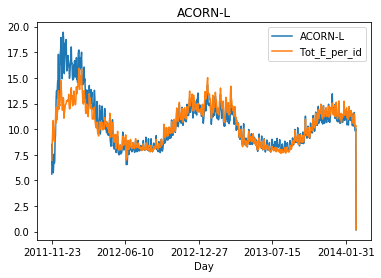

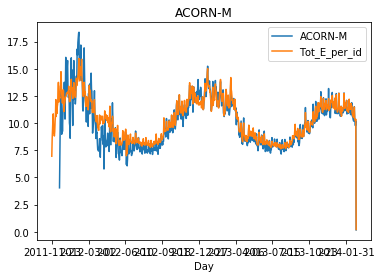

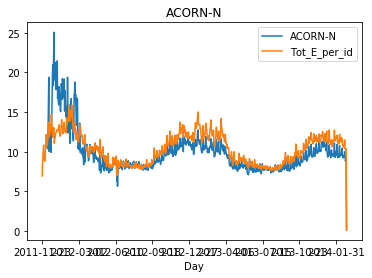

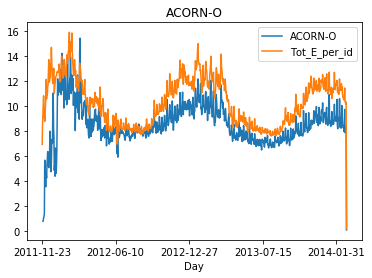

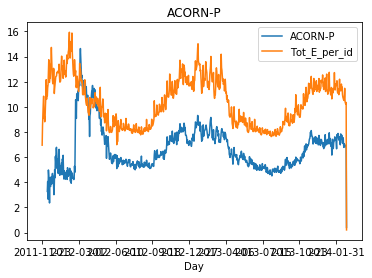

In [25]:
# use visualizations to compare each group to the overall average
for i in dfe.columns[1:]:
    dfe[i].plot(legend=True)
    dfe['Tot_E_per_id'].plot(title=i,legend=True)
    plt.show()

In [26]:
weather = pd.read_csv('weather_hourly_darksky.csv')
weather.head()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [27]:
weather['Day'] = pd.to_datetime(weather.time).dt.strftime('%Y-%m-%d')

In [28]:
weather.tail()

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,Day
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy,2014-02-15
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear,2014-02-15
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear,2014-02-15
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear,2014-02-15
21164,14.31,246,5.38,2014-02-15 23:00:00,2.60,1001.25,1.77,5.09,rain,clear-night,0.82,Clear,2014-02-15


In [29]:
wdf = pd.pivot_table(weather,index='Day',aggfunc={'temperature':np.mean,'humidity':np.sum})
wdf.columns = ['Average_Humidity','Average_Temperature']
wdf

,Average_Humidity,Average_Temperature
Day,,
2011-11-01,20.09,12.907083
2011-11-02,20.97,12.343333
2011-11-03,21.27,15.307083
2011-11-04,21.87,13.467500
2011-11-05,22.12,12.204583
...,...,...
2014-03-27,18.45,6.058333
2014-03-28,17.96,8.262083
2014-03-29,15.63,12.502917


In [30]:
wdf.dtypes

Average_Humidity       float64
Average_Temperature    float64
dtype: object

In [34]:
dff = dfe.join(wdf, how='inner')

In [35]:
dff

,Tot_E_per_id,Affluent,ACORN-_x,Adversity,ACORN-U_x,Comfortable,ACORN-A,ACORN-_y,ACORN-D,ACORN-Q,...,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,Average_Humidity,Average_Temperature
Day,,,,,,,,,,,,,,,,,,,,,
2011-11-23,6.952692,11.551500,NaN,5.708500,NaN,4.680286,NaN,NaN,9.281000,5.798000,...,NaN,NaN,NaN,5.619000,NaN,NaN,NaN,NaN,22.22,7.442083
2011-11-24,8.536480,10.654900,NaN,8.250750,NaN,6.714545,NaN,NaN,14.481000,8.146333,...,NaN,NaN,NaN,8.564000,NaN,NaN,NaN,NaN,21.32,10.377083
2011-11-25,9.499781,11.062214,NaN,8.989333,NaN,7.932167,NaN,NaN,13.689000,11.595750,...,NaN,NaN,NaN,6.743000,NaN,NaN,0.810000,NaN,18.97,10.851667
2011-11-26,10.267707,12.207176,NaN,8.646714,NaN,8.995706,NaN,NaN,16.080000,10.726000,...,NaN,NaN,NaN,6.029000,NaN,NaN,0.868000,NaN,19.37,10.227083
2011-11-27,10.850805,12.611000,NaN,11.401429,NaN,8.863882,NaN,NaN,16.060000,14.590200,...,NaN,NaN,NaN,5.740000,NaN,NaN,1.119000,NaN,17.21,10.832083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-24,10.411403,12.049698,8.402,8.698425,10.463186,10.171652,18.314563,8.402,13.783350,7.603043,...,9.055468,10.780533,10.525262,10.262141,10.421301,9.572755,7.910624,6.95040,17.73,10.570000
2014-02-25,10.294997,11.980616,7.718,8.529100,10.595512,10.043865,18.770890,7.718,14.189906,7.597203,...,9.906021,10.430878,10.273389,9.911294,10.157204,8.826846,8.005215,6.93097,18.70,8.760417
2014-02-26,10.202945,11.853257,8.570,8.509451,10.600810,9.911072,18.297757,8.570,13.884457,7.561125,...,8.918319,10.492000,10.270620,9.801984,9.766524,9.099514,8.397473,6.85856,17.61,7.478750


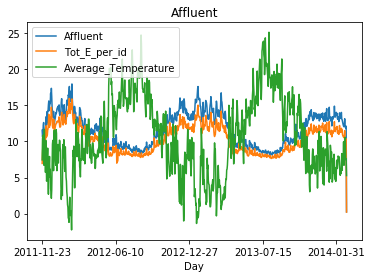

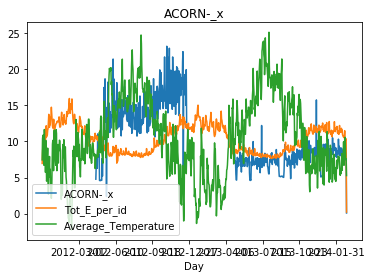

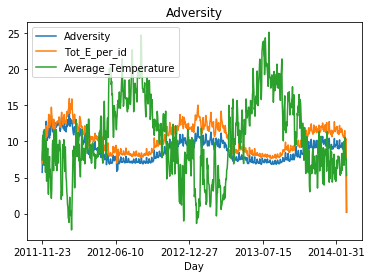

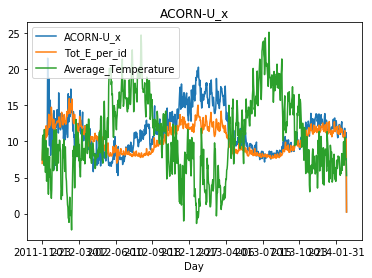

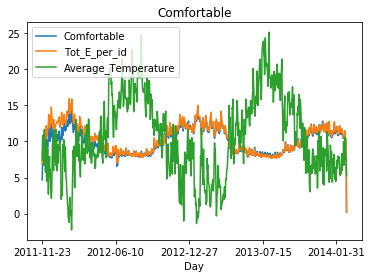

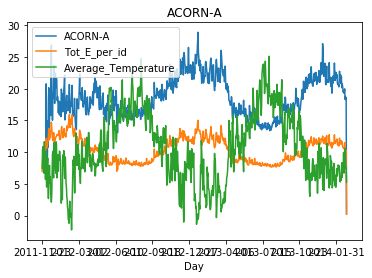

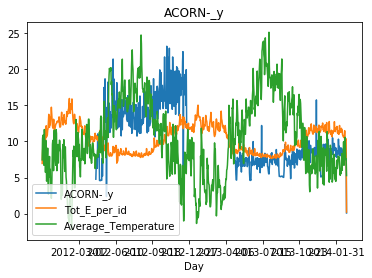

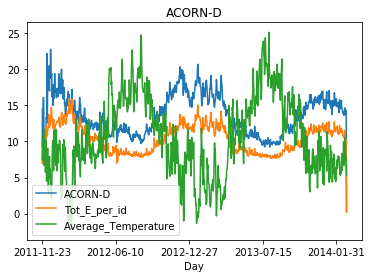

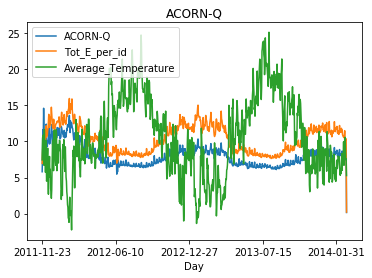

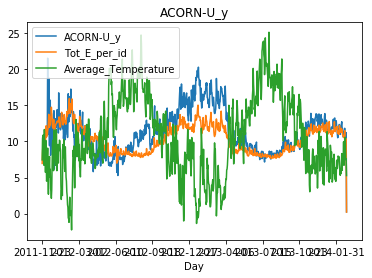

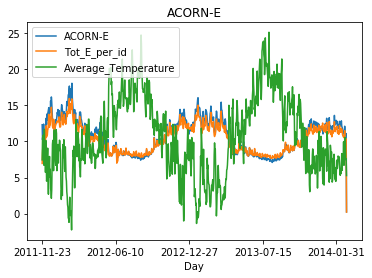

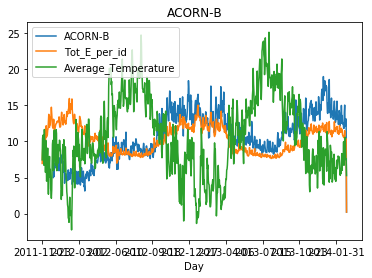

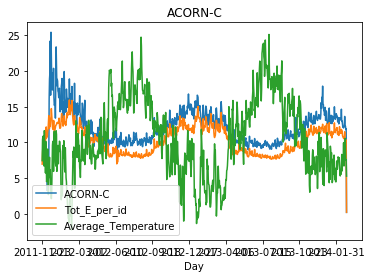

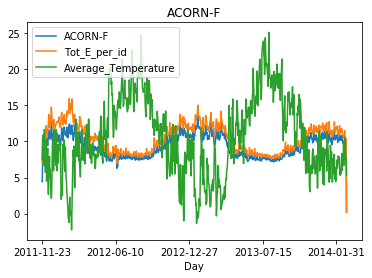

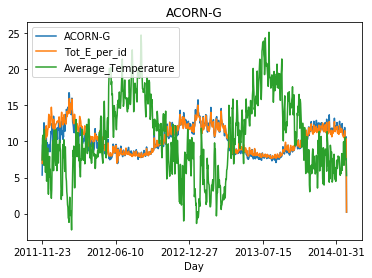

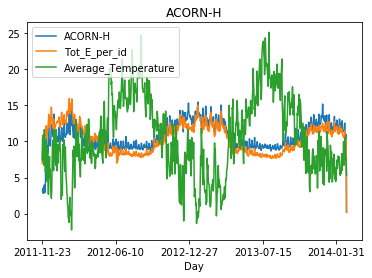

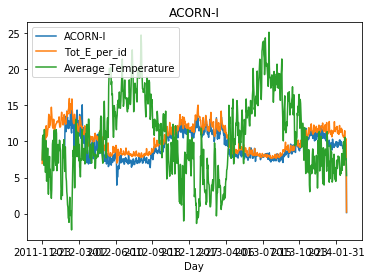

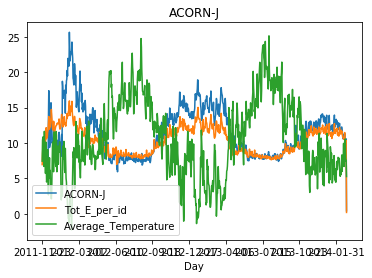

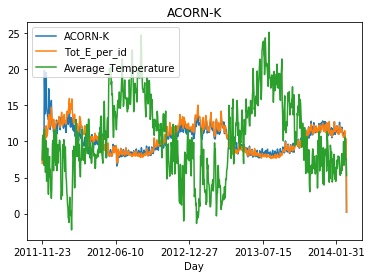

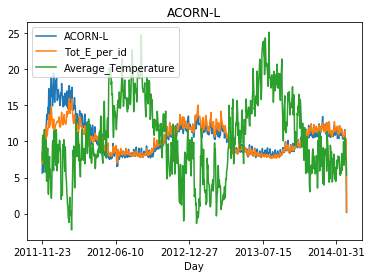

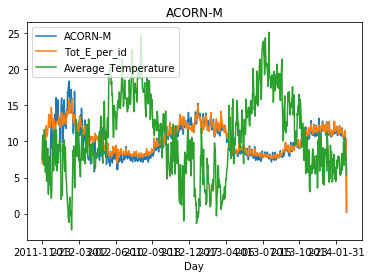

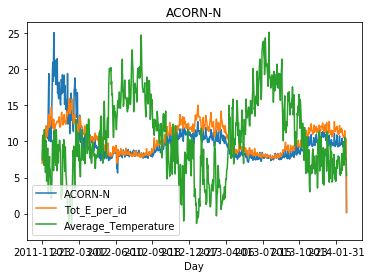

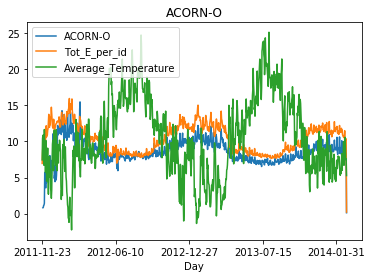

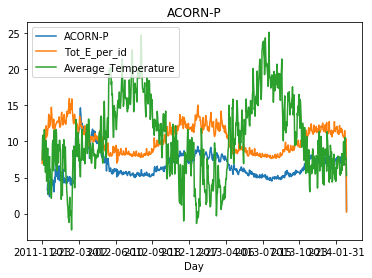

In [39]:
# use visualizations to compare each group to the overall average, adding temperature
for i in dff.columns[1:-2]:
    dff[i].plot(legend=True)
    dff['Tot_E_per_id'].plot(title=i,legend=True)
    dff['Average_Temperature'].plot(legend=True)
    plt.show()

In [37]:
len(dff.columns)

27